In [1]:
import numpy as np

# Load binary IMU data
imu_data = np.fromfile('datasets/imu_data/drone_2024-10-02_20_23_31_test_imu.bin', dtype=np.float32).reshape(-1, 10) 

In [2]:
imu_data

array([[-3.2653249e+26,  2.7218451e+01,  8.7768014e+22, ...,
         2.1629996e+00, -1.4689424e-19, -1.1428238e+00],
       [-5.3734400e-17, -9.4321436e-01,  1.8224687e+33, ...,
        -2.1016483e+00, -2.7597057e+32,  1.6192085e+00],
       [ 3.3440000e-01,  2.1851461e+00, -2.6846917e-24, ...,
         8.5232157e-01, -3.5788336e+26,  2.7218451e+01],
       ...,
       [-6.9680644e-24,  8.8924116e-01,  4.4935144e-36, ...,
         1.5665361e+00, -1.0013580e-09,  2.1713793e+00],
       [-5.0646202e-23, -1.1513506e+00, -9.2295340e-31, ...,
         2.7218452e+01,  1.4839806e+25, -2.1019475e+00],
       [-9.0866087e-07,  1.5880839e+00,  8.2941980e+24, ...,
        -9.4960946e-01, -3.3289341e-34,  9.0203136e-01]], dtype=float32)

/home/tirtha/anaconda3/envs/mmenv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1345: RuntimeWarning: invalid value encountered in cast
  return np.asarray(x, float)


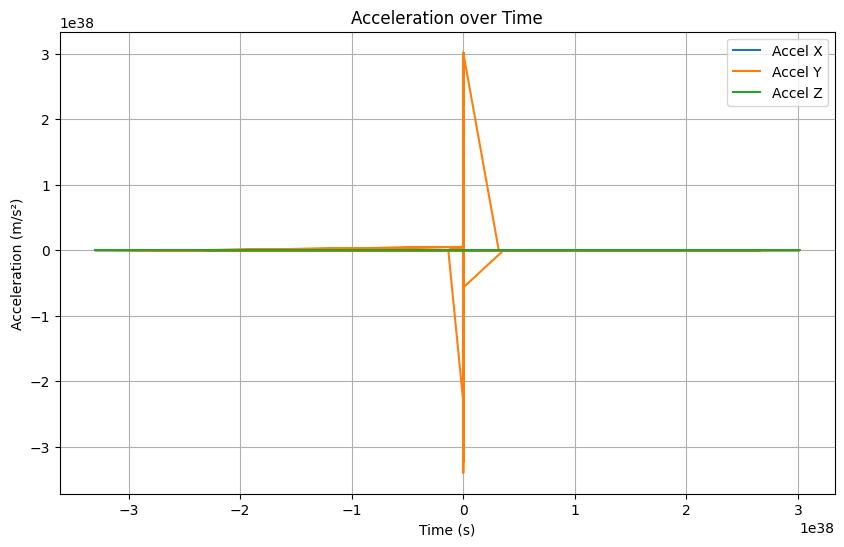

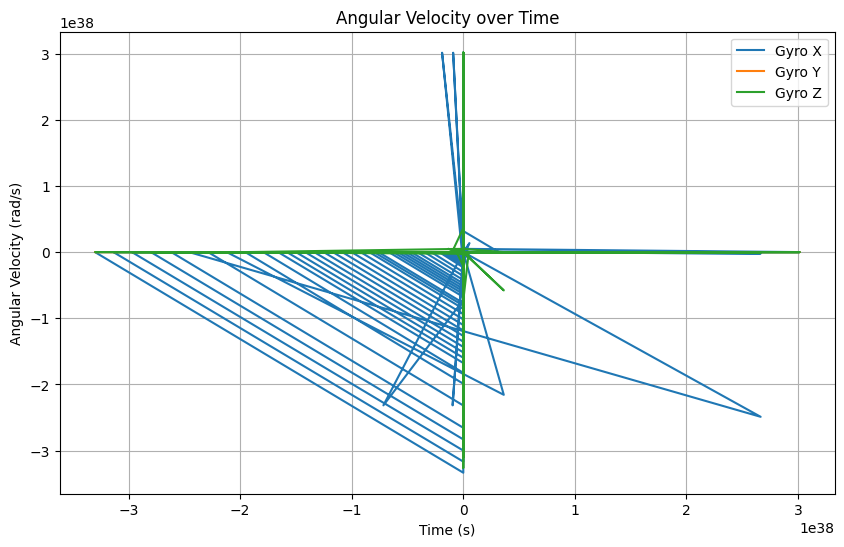

In [3]:
import matplotlib.pyplot as plt

timestamps = imu_data[:, 0]
acceleration = imu_data[:, 1:4]
gyroscope = imu_data[:, 4:7]

# Plot acceleration
plt.figure(figsize=(10, 6))
plt.plot(timestamps, acceleration[:, 0], label='Accel X')
plt.plot(timestamps, acceleration[:, 1], label='Accel Y')
plt.plot(timestamps, acceleration[:, 2], label='Accel Z')
plt.title('Acceleration over Time')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s²)')
plt.legend()
plt.grid()

# Plot gyroscope data
plt.figure(figsize=(10, 6))
plt.plot(timestamps, gyroscope[:, 0], label='Gyro X')
plt.plot(timestamps, gyroscope[:, 1], label='Gyro Y')
plt.plot(timestamps, gyroscope[:, 2], label='Gyro Z')
plt.title('Angular Velocity over Time')
plt.xlabel('Time (s)')
plt.ylabel('Angular Velocity (rad/s)')
plt.legend()
plt.grid()
plt.show()


In [4]:
from scipy.spatial.transform import Rotation as R

quaternions = imu_data[:, 7:11]  # qw, qx, qy, qz
r = R.from_quat(quaternions[:, 1:])  # Convert to Euler
euler_angles = r.as_euler('xyz', degrees=True)  # Roll, Pitch, Yaw

# Plot roll, pitch, yaw
plt.figure(figsize=(10, 6))
plt.plot(timestamps, euler_angles[:, 0], label='Roll')
plt.plot(timestamps, euler_angles[:, 1], label='Pitch')
plt.plot(timestamps, euler_angles[:, 2], label='Yaw')
plt.title('Orientation (Euler Angles) over Time')
plt.xlabel('Time (s)')
plt.ylabel('Angle (degrees)')
plt.legend()
plt.grid()
plt.show()


/tmp/ipykernel_279935/1434944913.py:4: RuntimeWarning: invalid value encountered in cast
  r = R.from_quat(quaternions[:, 1:])  # Convert to Euler


ValueError: Expected `quat` to have shape (4,) or (N x 4), got (3087, 2).

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

position = np.cumsum(acceleration, axis=0)  # Simplified for illustration

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(position[:, 0], position[:, 1], position[:, 2])
ax.set_title('Trajectory')
ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_zlabel('Z Position')
plt.show()
